# IPL Data Analysis

In [2]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [14]:
ball_data = pd.read_csv("C:/Users/hp/Desktop/IPL Ball-by-Ball 2008-2020.csv")
match_data  = pd.read_csv("C:/Users/hp/Desktop/IPL Matches 2008-2020.csv")

In [15]:
match_data.head()

,id,city,date,player_of_match,venue,neutral_venue,team1,team2,toss_winner,toss_decision,winner,result,result_margin,eliminator,method,umpire1,umpire2
0,335982,Bangalore,18-04-2008,BB McCullum,M Chinnaswamy Stadium,0,Royal Challengers Bangalore,Kolkata Knight Riders,Royal Challengers Bangalore,field,Kolkata Knight Riders,runs,140.0,N,NaN,Asad Rauf,RE Koertzen
1,335983,Chandigarh,19-04-2008,MEK Hussey,"Punjab Cricket Association Stadium, Mohali",0,Kings XI Punjab,Chennai Super Kings,Chennai Super Kings,bat,Chennai Super Kings,runs,33.0,N,NaN,MR Benson,SL Shastri
2,335984,Delhi,19-04-2008,MF Maharoof,Feroz Shah Kotla,0,Delhi Daredevils,Rajasthan Royals,Rajasthan Royals,bat,Delhi Daredevils,wickets,9.0,N,NaN,Aleem Dar,GA Pratapkumar
3,335985,Mumbai,20-04-2008,MV Boucher,Wankhede Stadium,0,Mumbai Indians,Royal Challengers Bangalore,Mumbai Indians,bat,Royal Challengers Bangalore,wickets,5.0,N,NaN,SJ Davis,DJ Harper
4,335986,Kolkata,20-04-2008,DJ Hussey,Eden Gardens,0,Kolkata Knight Riders,Deccan Chargers,Deccan Chargers,bat,Kolkata Knight Riders,wickets,5.0,N,NaN,BF Bowden,K Hariharan


In [16]:
ball_data.head()

,id,inning,over,ball,batsman,non_striker,bowler,batsman_runs,extra_runs,total_runs,non_boundary,is_wicket,dismissal_kind,player_dismissed,fielder,extras_type,batting_team,bowling_team
0,335982,1,6,5,RT Ponting,BB McCullum,AA Noffke,1,0,1,0,0,NaN,NaN,NaN,NaN,Kolkata Knight Riders,Royal Challengers Bangalore
1,335982,1,6,6,BB McCullum,RT Ponting,AA Noffke,1,0,1,0,0,NaN,NaN,NaN,NaN,Kolkata Knight Riders,Royal Challengers Bangalore
2,335982,1,7,1,BB McCullum,RT Ponting,Z Khan,0,0,0,0,0,NaN,NaN,NaN,NaN,Kolkata Knight Riders,Royal Challengers Bangalore
3,335982,1,7,2,BB McCullum,RT Ponting,Z Khan,1,0,1,0,0,NaN,NaN,NaN,NaN,Kolkata Knight Riders,Royal Challengers Bangalore
4,335982,1,7,3,RT Ponting,BB McCullum,Z Khan,1,0,1,0,0,NaN,NaN,NaN,NaN,Kolkata Knight Riders,Royal Challengers Bangalore


In [23]:
match_data.isnull().sum()

id                   0
city                13
date                 0
player_of_match      4
venue                0
neutral_venue        0
team1                0
team2                0
toss_winner          0
toss_decision        0
winner               4
result               4
result_margin       17
eliminator           4
method             797
umpire1              0
umpire2              0
dtype: int64

In [26]:
ball_data.isnull().sum()

id                       0
inning                   0
over                     0
ball                     0
batsman                  0
non_striker              0
bowler                   0
batsman_runs             0
extra_runs               0
total_runs               0
non_boundary             0
is_wicket                0
dismissal_kind      183973
player_dismissed    183973
fielder             186684
extras_type         183235
batting_team             0
bowling_team           191
dtype: int64

In [28]:
match_data.shape

(816, 17)

In [30]:
ball_data.shape

(193468, 18)

In [32]:
match_data.columns

Index(['id', 'city', 'date', 'player_of_match', 'venue', 'neutral_venue',
       'team1', 'team2', 'toss_winner', 'toss_decision', 'winner', 'result',
       'result_margin', 'eliminator', 'method', 'umpire1', 'umpire2'],
      dtype='object')

In [34]:
ball_data.columns

Index(['id', 'inning', 'over', 'ball', 'batsman', 'non_striker', 'bowler',
       'batsman_runs', 'extra_runs', 'total_runs', 'non_boundary', 'is_wicket',
       'dismissal_kind', 'player_dismissed', 'fielder', 'extras_type',
       'batting_team', 'bowling_team'],
      dtype='object')

In [51]:
print('Matches played so far : ', len(match_data))

Matches played so far :  816


In [60]:
print('Cities played at : ', match_data['city'].unique())

Cities played at :  ['Bangalore' 'Chandigarh' 'Delhi' 'Mumbai' 'Kolkata' 'Jaipur' 'Hyderabad'
 'Chennai' 'Cape Town' 'Port Elizabeth' 'Durban' 'Centurion' 'East London'
 'Johannesburg' 'Kimberley' 'Bloemfontein' 'Ahmedabad' 'Cuttack' 'Nagpur'
 'Dharamsala' 'Kochi' 'Indore' 'Visakhapatnam' 'Pune' 'Raipur' 'Ranchi'
 'Abu Dhabi' nan 'Rajkot' 'Kanpur' 'Bengaluru' 'Dubai' 'Sharjah']


In [66]:
print('Teams participated : ',match_data['team1'].unique())

Teams participated :  ['Royal Challengers Bangalore' 'Kings XI Punjab' 'Delhi Daredevils'
 'Mumbai Indians' 'Kolkata Knight Riders' 'Rajasthan Royals'
 'Deccan Chargers' 'Chennai Super Kings' 'Kochi Tuskers Kerala'
 'Pune Warriors' 'Sunrisers Hyderabad' 'Gujarat Lions'
 'Rising Pune Supergiants' 'Rising Pune Supergiant' 'Delhi Capitals']


In [77]:
match_data['season'] = pd.DatetimeIndex(match_data['date']).year
match_data['season']

0      2008
1      2008
2      2008
3      2008
4      2008
       ... 
811    2020
812    2020
813    2020
814    2020
815    2020
Name: season, Length: 816, dtype: int64

In [73]:
list = []
for date in match_data['date']:
    list.append(date.split('-')[2])
list

['2008',
 '2008',
 '2008',
 '2008',
 '2008',
 '2008',
 '2008',
 '2008',
 '2008',
 '2008',
 '2008',
 '2008',
 '2008',
 '2008',
 '2008',
 '2008',
 '2008',
 '2008',
 '2008',
 '2008',
 '2008',
 '2008',
 '2008',
 '2008',
 '2008',
 '2008',
 '2008',
 '2008',
 '2008',
 '2008',
 '2008',
 '2008',
 '2008',
 '2008',
 '2008',
 '2008',
 '2008',
 '2008',
 '2008',
 '2008',
 '2008',
 '2008',
 '2008',
 '2008',
 '2008',
 '2008',
 '2008',
 '2008',
 '2008',
 '2008',
 '2008',
 '2008',
 '2008',
 '2008',
 '2008',
 '2008',
 '2008',
 '2008',
 '2009',
 '2009',
 '2009',
 '2009',
 '2009',
 '2009',
 '2009',
 '2009',
 '2009',
 '2009',
 '2009',
 '2009',
 '2009',
 '2009',
 '2009',
 '2009',
 '2009',
 '2009',
 '2009',
 '2009',
 '2009',
 '2009',
 '2009',
 '2009',
 '2009',
 '2009',
 '2009',
 '2009',
 '2009',
 '2009',
 '2009',
 '2009',
 '2009',
 '2009',
 '2009',
 '2009',
 '2009',
 '2009',
 '2009',
 '2009',
 '2009',
 '2009',
 '2009',
 '2009',
 '2009',
 '2009',
 '2009',
 '2009',
 '2009',
 '2009',
 '2009',
 '2009',
 '2009',
 

In [76]:
match_data['season'] = list
match_data['season']

0      2008
1      2008
2      2008
3      2008
4      2008
       ... 
811    2020
812    2020
813    2020
814    2020
815    2020
Name: season, Length: 816, dtype: object

In [79]:
match_data.head()

,id,city,date,player_of_match,venue,neutral_venue,team1,team2,toss_winner,toss_decision,winner,result,result_margin,eliminator,method,umpire1,umpire2,season
0,335982,Bangalore,18-04-2008,BB McCullum,M Chinnaswamy Stadium,0,Royal Challengers Bangalore,Kolkata Knight Riders,Royal Challengers Bangalore,field,Kolkata Knight Riders,runs,140.0,N,NaN,Asad Rauf,RE Koertzen,2008
1,335983,Chandigarh,19-04-2008,MEK Hussey,"Punjab Cricket Association Stadium, Mohali",0,Kings XI Punjab,Chennai Super Kings,Chennai Super Kings,bat,Chennai Super Kings,runs,33.0,N,NaN,MR Benson,SL Shastri,2008
2,335984,Delhi,19-04-2008,MF Maharoof,Feroz Shah Kotla,0,Delhi Daredevils,Rajasthan Royals,Rajasthan Royals,bat,Delhi Daredevils,wickets,9.0,N,NaN,Aleem Dar,GA Pratapkumar,2008
3,335985,Mumbai,20-04-2008,MV Boucher,Wankhede Stadium,0,Mumbai Indians,Royal Challengers Bangalore,Mumbai Indians,bat,Royal Challengers Bangalore,wickets,5.0,N,NaN,SJ Davis,DJ Harper,2008
4,335986,Kolkata,20-04-2008,DJ Hussey,Eden Gardens,0,Kolkata Knight Riders,Deccan Chargers,Deccan Chargers,bat,Kolkata Knight Riders,wickets,5.0,N,NaN,BF Bowden,K Hariharan,2008


In [104]:
match_per_season = match_data.groupby(['season'])['id'].count().reset_index().rename(columns={'id':'matches'})
match_per_season

,season,matches
0,2008,58
1,2009,57
2,2010,60
3,2011,73
4,2012,74
5,2013,76
6,2014,60
7,2015,59
8,2016,60
9,2017,59


C:\Users\hp\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Text(0.5, 1.0, 'Total Matches played in each season')

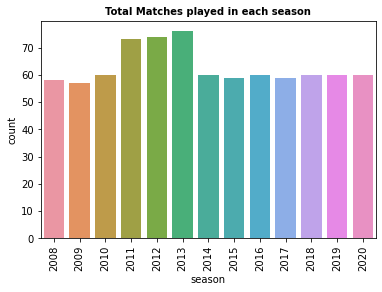

In [114]:
sns.countplot(match_data['season'])
plt.xticks(rotation = 90, fontsize = 10)
plt.yticks(fontsize = 10)
plt.xlabel('season', fontsize = 10)
plt.ylabel('count', fontsize = 10)
plt.title('Total Matches played in each season', fontsize =10, fontweight = 'bold')

In [115]:
season_data = match_data[['id', 'season']].merge(ball_data, left_on = 'id', right_on = 'id', how = 'left').drop('id', axis = 1)
season_data.head()

,season,inning,over,ball,batsman,non_striker,bowler,batsman_runs,extra_runs,total_runs,non_boundary,is_wicket,dismissal_kind,player_dismissed,fielder,extras_type,batting_team,bowling_team
0,2008,1,6,5,RT Ponting,BB McCullum,AA Noffke,1,0,1,0,0,NaN,NaN,NaN,NaN,Kolkata Knight Riders,Royal Challengers Bangalore
1,2008,1,6,6,BB McCullum,RT Ponting,AA Noffke,1,0,1,0,0,NaN,NaN,NaN,NaN,Kolkata Knight Riders,Royal Challengers Bangalore
2,2008,1,7,1,BB McCullum,RT Ponting,Z Khan,0,0,0,0,0,NaN,NaN,NaN,NaN,Kolkata Knight Riders,Royal Challengers Bangalore
3,2008,1,7,2,BB McCullum,RT Ponting,Z Khan,1,0,1,0,0,NaN,NaN,NaN,NaN,Kolkata Knight Riders,Royal Challengers Bangalore
4,2008,1,7,3,RT Ponting,BB McCullum,Z Khan,1,0,1,0,0,NaN,NaN,NaN,NaN,Kolkata Knight Riders,Royal Challengers Bangalore


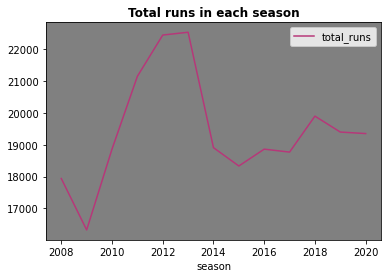

In [121]:
season = season_data.groupby(['season'])['total_runs'].sum().reset_index()
p = season.set_index('season')
ax = plt.axes()
ax.set(facecolor = 'grey')
sns.lineplot(data=p, palette='magma')
plt.title('Total runs in each season', fontsize = 12, fontweight = 'bold')
plt.show()

In [122]:
runs_per_season = pd.concat([match_per_season, season.iloc[:,1]], axis=1)
runs_per_season['Runs scored per match'] = runs_per_season['total_runs']/runs_per_season['matches']
runs_per_season.set_index('season', inplace = True)
runs_per_season

,matches,total_runs,Runs scored per match
season,,,
2008,58,17937,309.258621
2009,57,16320,286.315789
2010,60,18864,314.400000
2011,73,21154,289.780822
2012,74,22453,303.418919
2013,76,22541,296.592105
2014,60,18909,315.150000
2015,59,18332,310.711864
2016,60,18862,314.366667


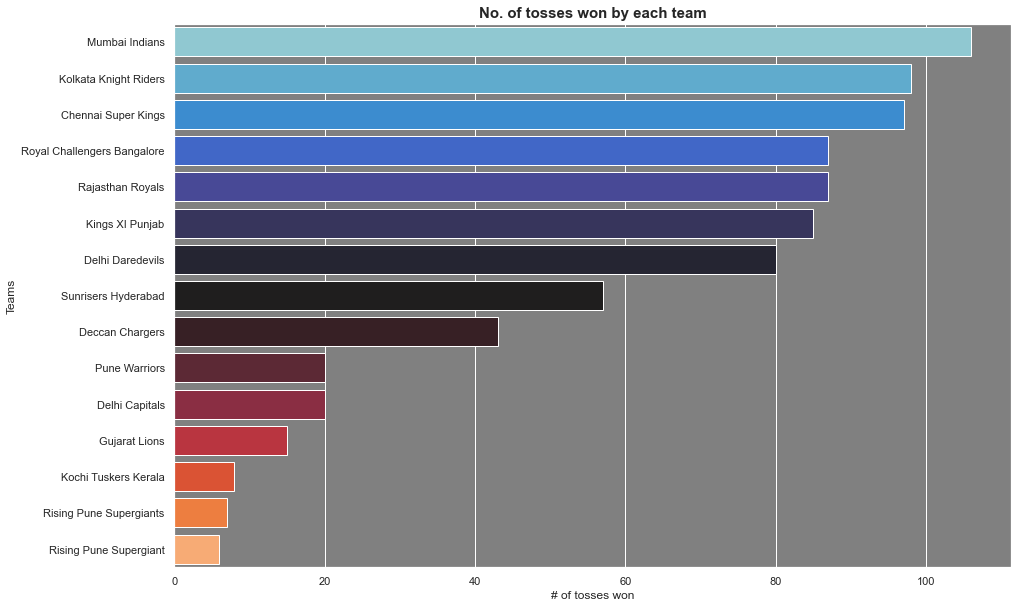

In [126]:
toss = match_data['toss_winner'].value_counts()
ax = plt.axes()
ax.set(facecolor = 'grey')
sns.set(rc={'figure.figsize':(15,10)}, style='darkgrid')
ax.set_title('No. of tosses won by each team', fontsize=15, fontweight='bold')
sns.barplot(y=toss.index, x=toss, orient='h', palette='icefire', saturation=1)
plt.xlabel('# of tosses won')
plt.ylabel('Teams')
plt.show()

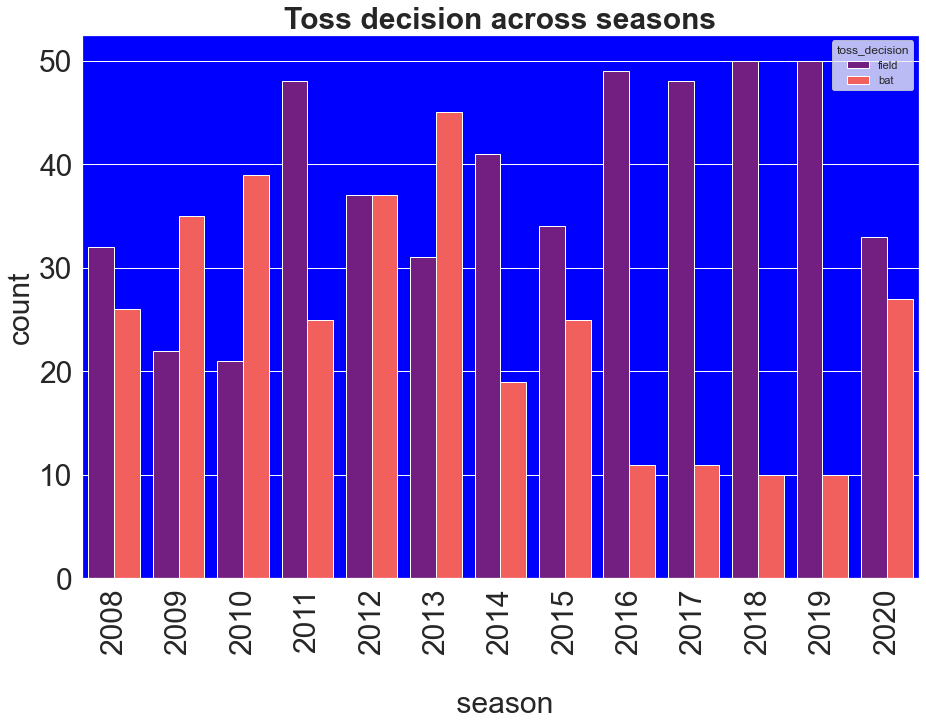

In [134]:
ax = plt.axes()
ax.set(facecolor = 'blue')
sns.countplot(x='season', hue='toss_decision', data=match_data, palette='magma', saturation=1)
plt.xticks(rotation = 90, fontsize = 30)
plt.yticks(fontsize = 30)
plt.xlabel('\n season', fontsize = 30)
plt.ylabel('count', fontsize = 30)
plt.title('Toss decision across seasons', fontsize=30, fontweight='bold')
plt.show()

In [135]:
match_data['result'].value_counts()

wickets    435
runs       364
tie         13
Name: result, dtype: int64

In [154]:
match_data[match_data['result']=='wickets']['venue'].value_counts().iloc[0:1]

Eden Gardens    45
Name: venue, dtype: int64

In [155]:
match_data[match_data['result']=='runs']['venue'].value_counts().iloc[0:1]

Feroz Shah Kotla    35
Name: venue, dtype: int64

In [156]:
match_data.columns

Index(['id', 'city', 'date', 'player_of_match', 'venue', 'neutral_venue',
       'team1', 'team2', 'toss_winner', 'toss_decision', 'winner', 'result',
       'result_margin', 'eliminator', 'method', 'umpire1', 'umpire2',
       'season'],
      dtype='object')

In [157]:
match_data[match_data['toss_winner'] == match_data['winner']]['venue'].value_counts()

Eden Gardens                                            43
Feroz Shah Kotla                                        38
Wankhede Stadium                                        37
M Chinnaswamy Stadium                                   35
MA Chidambaram Stadium, Chepauk                         30
Sawai Mansingh Stadium                                  25
Rajiv Gandhi International Stadium, Uppal               21
Punjab Cricket Association Stadium, Mohali              16
Sheikh Zayed Stadium                                    15
Maharashtra Cricket Association Stadium                 14
Punjab Cricket Association IS Bindra Stadium, Mohali    11
Dubai International Cricket Stadium                     11
Dr DY Patil Sports Academy                               9
Kingsmead                                                9
Sharjah Cricket Stadium                                  9
Subrata Roy Sahara Stadium                               9
M.Chinnaswamy Stadium                                   

In [158]:
match_data[match_data['result'] == 'wickets']['winner'].value_counts()

Kolkata Knight Riders          57
Mumbai Indians                 56
Chennai Super Kings            53
Royal Challengers Bangalore    51
Rajasthan Royals               51
Kings XI Punjab                45
Delhi Daredevils               42
Sunrisers Hyderabad            31
Gujarat Lions                  12
Deccan Chargers                11
Delhi Capitals                  8
Pune Warriors                   6
Rising Pune Supergiant          5
Kochi Tuskers Kerala            4
Rising Pune Supergiants         3
Name: winner, dtype: int64

In [159]:
match_data[match_data['result'] == 'runs']['winner'].value_counts()

Mumbai Indians                 62
Chennai Super Kings            53
Kolkata Knight Riders          41
Kings XI Punjab                40
Royal Challengers Bangalore    38
Sunrisers Hyderabad            34
Rajasthan Royals               28
Delhi Daredevils               25
Deccan Chargers                18
Delhi Capitals                  9
Pune Warriors                   6
Rising Pune Supergiant          5
Kochi Tuskers Kerala            2
Rising Pune Supergiants         2
Gujarat Lions                   1
Name: winner, dtype: int64

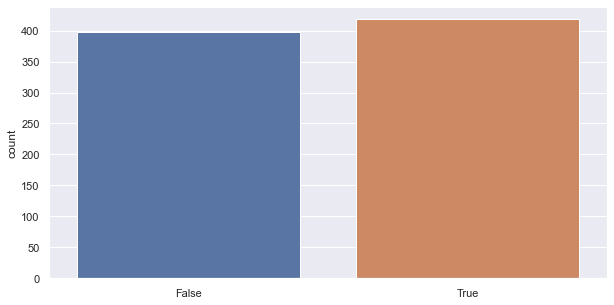

In [161]:
toss = match_data['toss_winner']==match_data['winner']
plt.figure(figsize=(10,5))
sns.countplot(toss)
plt.show()

C:\Users\hp\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


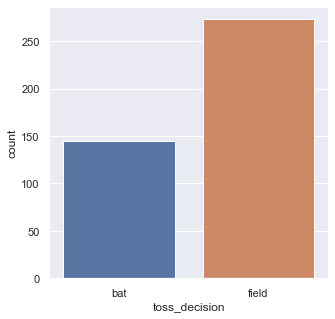

In [176]:
plt.figure(figsize=(5,5))
sns.countplot(match_data[match_data['toss_winner']==match_data['winner']]['toss_decision'])
plt.show()

In [181]:
player = (ball_data['batsman']=='SK Raina')
df_raina = ball_data[player]
df_raina.head()

,id,inning,over,ball,batsman,non_striker,bowler,batsman_runs,extra_runs,total_runs,non_boundary,is_wicket,dismissal_kind,player_dismissed,fielder,extras_type,batting_team,bowling_team
246,335983,1,10,3,SK Raina,MEK Hussey,PP Chawla,2,0,2,0,0,NaN,NaN,NaN,NaN,Chennai Super Kings,Kings XI Punjab
247,335983,1,10,4,SK Raina,MEK Hussey,PP Chawla,0,0,0,0,0,NaN,NaN,NaN,NaN,Chennai Super Kings,Kings XI Punjab
248,335983,1,10,5,SK Raina,MEK Hussey,PP Chawla,6,0,6,0,0,NaN,NaN,NaN,NaN,Chennai Super Kings,Kings XI Punjab
249,335983,1,10,6,SK Raina,MEK Hussey,PP Chawla,4,0,4,0,0,NaN,NaN,NaN,NaN,Chennai Super Kings,Kings XI Punjab
253,335983,1,11,4,SK Raina,MEK Hussey,K Goel,6,0,6,0,0,NaN,NaN,NaN,NaN,Chennai Super Kings,Kings XI Punjab


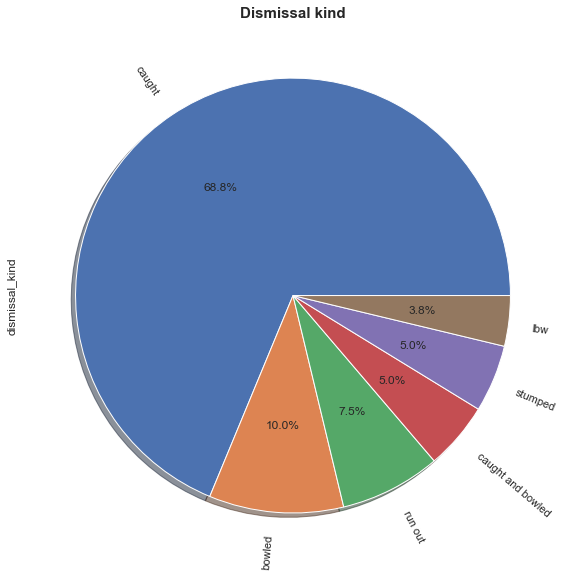

In [183]:
df_raina['dismissal_kind'].value_counts().plot.pie(autopct='%1.1f%%', shadow=True, rotatelabels=True)
plt.title('Dismissal kind', fontweight='bold', fontsize=15)
plt.show()

In [184]:
def count(df_raina,runs):
    return len(df_raina[df_raina['batsman_runs']==runs])*runs

In [185]:
print('Runs scored from 1s :', count(df_raina,1))
print('Runs scored from 2s :', count(df_raina,2))
print('Runs scored from 3s :', count(df_raina,3))
print('Runs scored from 4s :', count(df_raina,4))
print('Runs scored from 6s :', count(df_raina,6))

Runs scored from 1s : 1666
Runs scored from 2s : 528
Runs scored from 3s : 33
Runs scored from 4s : 1972
Runs scored from 6s : 1164


In [194]:
match_data[match_data['result_margin']==match_data['result_margin'].max()]

,id,city,date,player_of_match,venue,neutral_venue,team1,team2,toss_winner,toss_decision,winner,result,result_margin,eliminator,method,umpire1,umpire2,season
620,1082635,Delhi,06-05-2017,LMP Simmons,Feroz Shah Kotla,0,Delhi Daredevils,Mumbai Indians,Delhi Daredevils,field,Mumbai Indians,runs,146.0,N,NaN,Nitin Menon,CK Nandan,2017


In [196]:
runs = ball_data.groupby(['batsman'])['batsman_runs'].sum().reset_index()
runs.columns=['batsman', 'runs']
y = runs.sort_values(by='runs', ascending = False).head(10).reset_index().drop('index', axis=1)
y

,batsman,runs
0,V Kohli,5878
1,SK Raina,5368
2,DA Warner,5254
3,RG Sharma,5230
4,S Dhawan,5197
5,AB de Villiers,4849
6,CH Gayle,4772
7,MS Dhoni,4632
8,RV Uthappa,4607
9,G Gambhir,4217


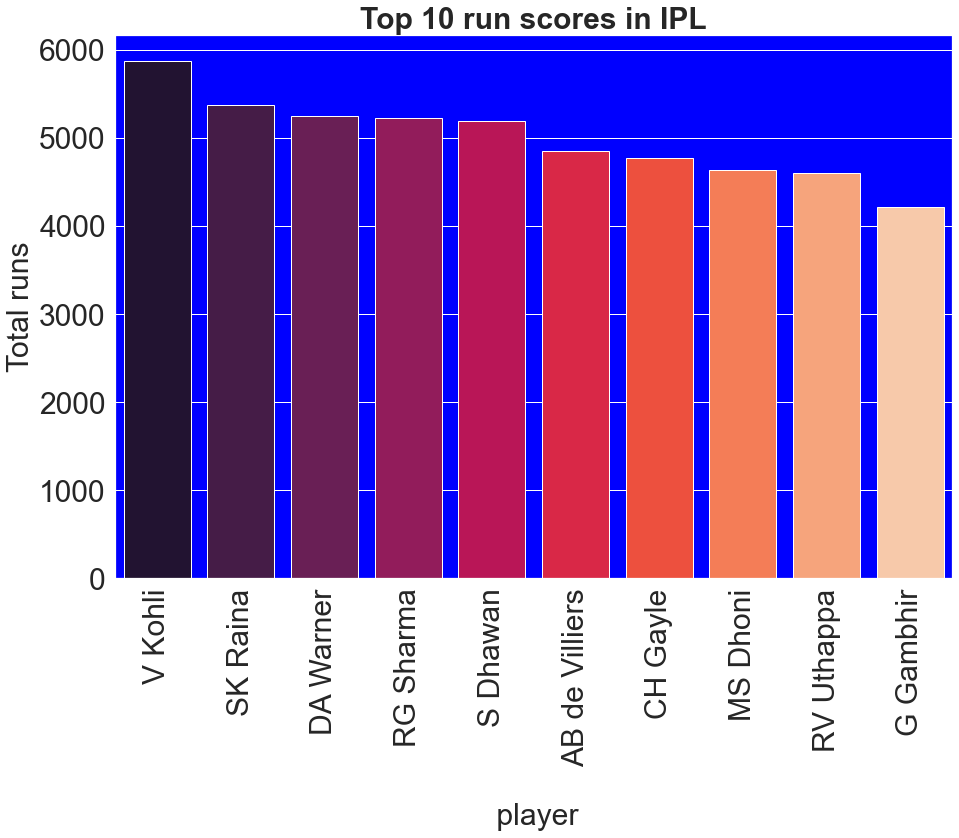

In [199]:
ax = plt.axes()
ax.set(facecolor = 'blue')
sns.barplot(x=y['batsman'], y=y['runs'], palette='rocket', saturation=1)
plt.xticks(rotation = 90, fontsize = 30)
plt.yticks(fontsize = 30)
plt.xlabel('\n player', fontsize = 30)
plt.ylabel('Total runs', fontsize = 30)
plt.title('Top 10 run scores in IPL', fontsize=30, fontweight='bold')
plt.show()

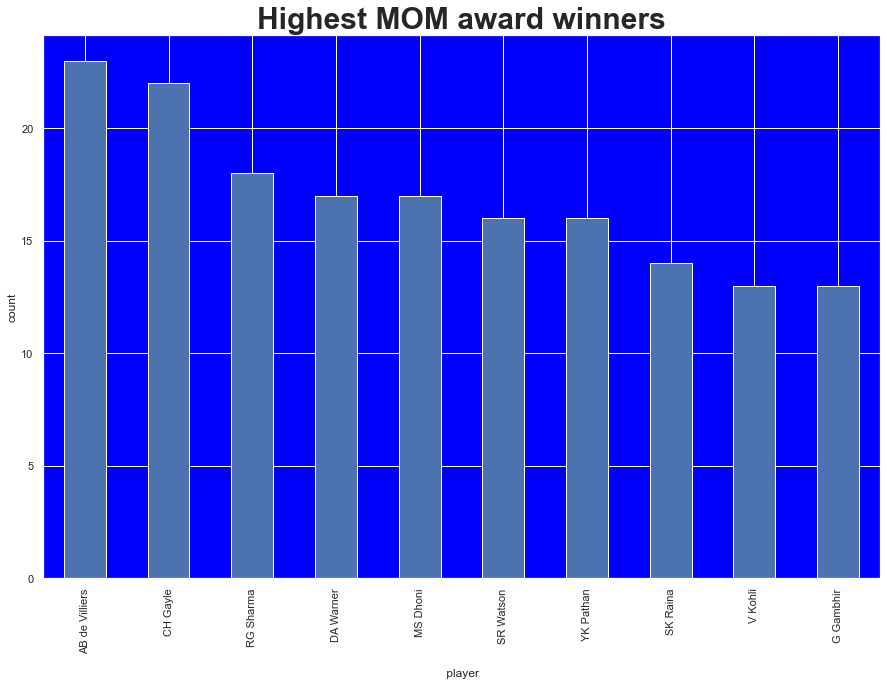

In [200]:
ax = plt.axes()
ax.set(facecolor = 'blue')
match_data.player_of_match.value_counts()[:10].plot(kind='bar')
plt.xlabel('\n player')
plt.ylabel('count')
plt.title('Highest MOM award winners', fontsize=30, fontweight='bold')
plt.show()